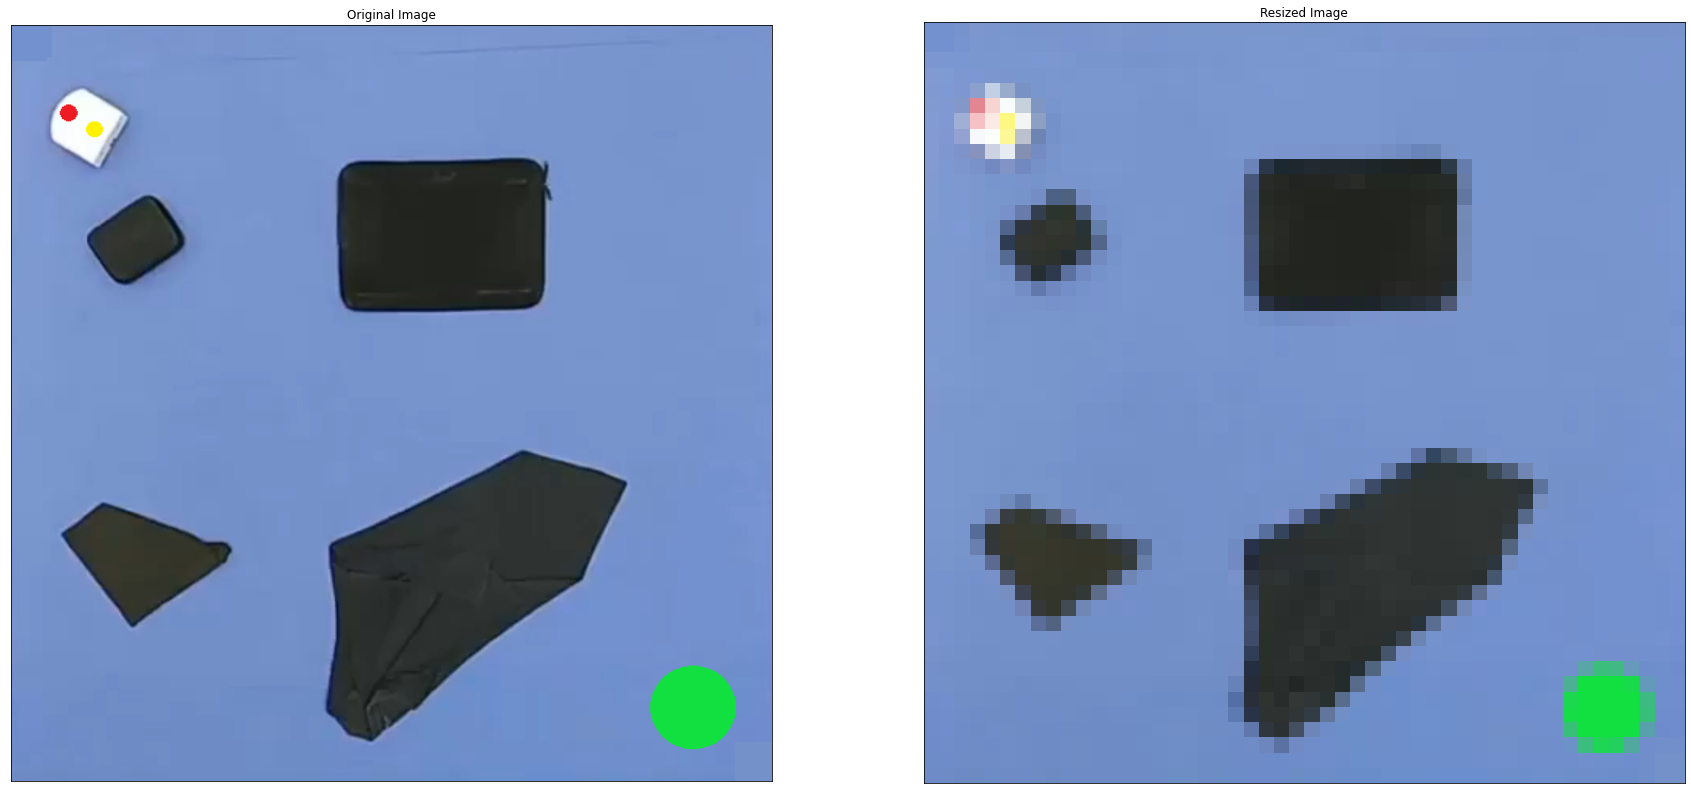

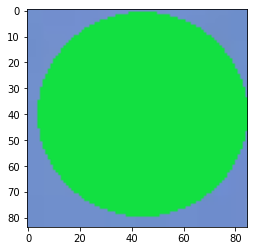

Position of the goal [x, y] : [42, 8]


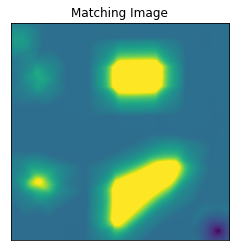

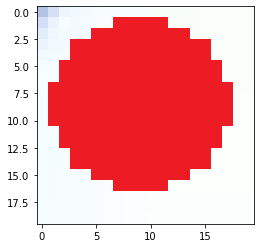

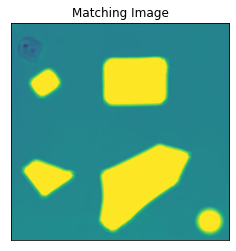

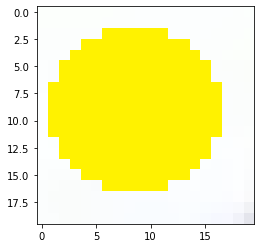

[45, 640]
[70, 625]
715
[-25, 15]
Position of the robot [x, y, theta] : [4, 44, 2.601173153319209]


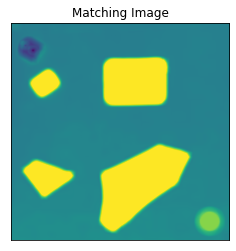

In [58]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

MAP_SIZE = 50

filename = 'input_picture_2.png'
img = cv2.imread(filename, cv2.IMREAD_COLOR)
original_height, original_width = img.shape[:2]


resized = cv2.resize(img, (MAP_SIZE,MAP_SIZE), interpolation = cv2.INTER_AREA) 
plt.figure(figsize=(30,50))
plt.subplot(121),plt.imshow(img[:,:,::-1])
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(resized[:,:,::-1])
plt.title('Resized Image'), plt.xticks([]), plt.yticks([])

plt.show

##################### GOAL ##########################
template_goal = img[605:689,600:685,:]
plt.figure()
plt.imshow(template_goal[:,:,::-1])
plt.show()

#c, w, h  = template_goal.shape[::-1]
res = cv2.matchTemplate(img,template_goal,cv2.TM_SQDIFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

plt.imshow(res)
plt.title('Matching Image'), plt.xticks([]), plt.yticks([])

goal = min_loc
x_goal=int(np.round(goal[0]*MAP_SIZE/original_width))
y_goal=MAP_SIZE-int(np.round(goal[1]*MAP_SIZE/original_height)) #confirm height and width
goal = [x_goal, y_goal]
print("Position of the goal [x, y] :", goal)

##################### ROBOT ##########################
template_red_point = img[75:95,45:65,:]
plt.figure()
plt.imshow(template_red_point[:,:,::-1])
plt.show()

res = cv2.matchTemplate(img,template_red_point,cv2.TM_SQDIFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

plt.imshow(res)
plt.title('Matching Image'), plt.xticks([]), plt.yticks([])

red = [min_loc[0], min_loc[1]]
red[1] = original_height-red[1]
#print("Position of the red point [x, y] :", red)


template_yellow_point = img[90:110,70:90,:]
plt.figure()
plt.imshow(template_yellow_point[:,:,::-1])
plt.show()

res = cv2.matchTemplate(img,template_yellow_point,cv2.TM_SQDIFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

plt.imshow(res)
plt.title('Matching Image'), plt.xticks([]), plt.yticks([])

yellow = [min_loc[0], min_loc[1]]
yellow[1] = original_height-yellow[1]
#print("Position of the yellow point [x, y] :", yellow)

############ Compute pos and orientation ############
print(red)
print(yellow)
print(original_height)

x=(red[0]+yellow[0])/2
y=(red[1]+yellow[1])/2
x=int(np.round(x*MAP_SIZE/original_width))
y=int(np.round(y*MAP_SIZE/original_height))

v = [red[0]-yellow[0], red[1]-yellow[1]]
print(v)

theta = math.atan2(v[1],v[0])

robot_pose = [x, y, theta]
print("Position of the robot [x, y, theta] :", robot_pose)